In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import seaborn as sns

In [47]:
city_data = os.path.join("../raw_data", "city_data.csv")
city_data_df = pd.read_csv(city_data)
ride_data = os.path.join("../raw_data", "ride_data.csv")
ride_data_df = pd.read_csv(ride_data)

In [49]:
city_group = city_data_df.groupby(city_data_df.columns.difference(["driver_count"]).tolist(), as_index=False).sum()
city_group.set_index("city")
city_group.head()

,city,type,driver_count
0,Alvarezhaven,Urban,21
1,Alyssaberg,Urban,67
2,Anitamouth,Suburban,16
3,Antoniomouth,Urban,21
4,Aprilchester,Urban,49


In [50]:
combined_ride = pd.merge(ride_data_df, city_group, how='outer', on='city')
combined_ride["total_ride"]=int(1)
ride_drop = combined_ride.drop(["date", "ride_id"], axis=1)

In [51]:
ride_group = ride_drop.groupby(["city", "type", "driver_count"], as_index=False).agg({"fare": "sum", "total_ride": "sum"})
ride_group["average_fare"] = ride_group["fare"] / ride_group["total_ride"]
ride_group.head()

,city,type,driver_count,fare,total_ride,average_fare
0,Alvarezhaven,Urban,21,741.79,31,23.928710
1,Alyssaberg,Urban,67,535.85,26,20.609615
2,Anitamouth,Suburban,16,335.84,9,37.315556
3,Antoniomouth,Urban,21,519.75,22,23.625000
4,Aprilchester,Urban,49,417.65,19,21.981579


In [78]:
Urban_ride = ride_group.groupby(ride_group.type)
Urban_ride2 = Urban_ride.get_group("Urban")
Suburban_ride = Urban_ride.get_group("Suburban")
Rural_ride = Urban_ride.get_group("Rural")

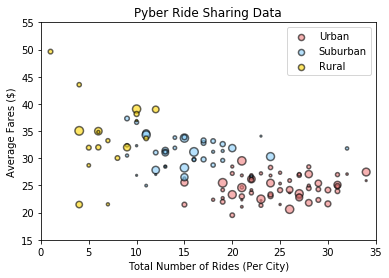

In [124]:
ax = Urban_ride2.plot(kind="scatter", x="total_ride", y="average_fare", color="lightcoral", s=ride_group["driver_count"], alpha=0.6, edgecolor="black", label="Urban", linewidths=1.5)
Suburban_ride.plot(kind="scatter", x="total_ride", y="average_fare", color="lightskyblue", s=ride_group["driver_count"], alpha=0.6, edgecolor="black", label="Suburban", linewidths=1.5, ax=ax)
Rural_ride.plot(kind="scatter", x="total_ride", y="average_fare", color="gold", s=ride_group["driver_count"], alpha=0.6, edgecolor="black", label="Rural", linewidths=1.5, ax=ax)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fares ($)")
ax.set_xlim(0, 35)
ax.set_ylim(15, 55)
ax.set_title("Pyber Ride Sharing Data")
plt.show()

In [116]:
type_fare = ride_group.groupby(["type"], as_index=False).agg({"fare": "sum"})
type_fare["percent_fare"] = ((type_fare["fare"] / type_fare["fare"].sum())*100).map("{:.2f}%".format)
type_fare

,type,fare,percent_fare
0,Rural,4255.09,6.68%
1,Suburban,19317.88,30.35%
2,Urban,40078.34,62.97%


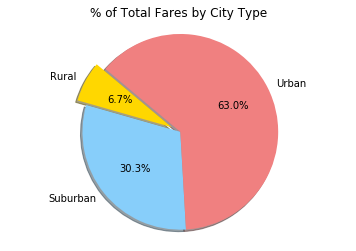

In [128]:
labels = type_fare["type"]
sizes = type_fare["fare"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

In [129]:
type_total_ride = ride_group.groupby(["type"], as_index=False).agg({"total_ride": "sum"})
type_total_ride

,type,total_ride
0,Rural,125
1,Suburban,625
2,Urban,1625


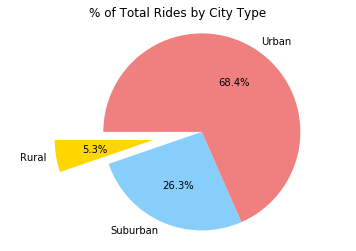

In [134]:
labels = type_total_ride["type"]
sizes = type_total_ride["total_ride"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.5, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=180)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

In [136]:
type_total_driver = ride_group.groupby(["type"], as_index=False).agg({"driver_count": "sum"})
type_total_driver

,type,driver_count
0,Rural,104
1,Suburban,638
2,Urban,2607


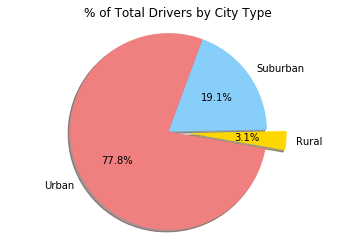

In [138]:
labels = type_total_driver["type"]
sizes = type_total_driver["driver_count"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.2, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=350)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()